# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [8]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 38
page_size = 100

reviews = []
stars = []
date = []
country = []


# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for item in parsed_content.find_all("div", {"class": "rating-10"}):
        try:
            stars.append(item.span.text)
        except:
            print(f'error on page {i}')
            stars.append('None')
    for item in parsed_content.find_all('time'):
        date.append(item.text)

    for item in parsed_content.find_all('h3'):
        country.append(item.span.next_sibling.text.strip(' ()'))
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [20]:
len(date), len(reviews), len(country), len(stars)

(3733, 3733, 3733, 3733)

In [19]:
stars = stars[:3733]

In [21]:
df = pd.DataFrame()
df["reviews"] = reviews
df['country'] = country
df['stars'] = stars
df['date'] = date
df.head()

reviews         country  \
0  Not Verified | Overall journey wasn’t bad howe...  United Kingdom   
1  ✅ Trip Verified |  Overall very satisfied. Gro...  United Kingdom   
2  ✅ Trip Verified |  As always when I fly BA it ...           Spain   
3  ✅ Trip Verified |  First time using BA busines...  United Kingdom   
4  Not Verified |  Extremely rude ground service....   United States   

                           stars               date  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  12th January 2024  
1                              4  12th January 2024  
2                              9   9th January 2024  
3                              1   7th January 2024  
4                              9   3rd January 2024

In [23]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Text cleanup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [3]:
df = pd.read_csv('data/BA_reviews.csv', index_col=0)
df.head()

reviews         country  stars  \
0  Not Verified | Overall journey wasn’t bad howe...  United Kingdom    5.0   
1  ✅ Trip Verified |  Overall very satisfied. Gro...  United Kingdom    4.0   
2  ✅ Trip Verified |  As always when I fly BA it ...           Spain    9.0   
3  ✅ Trip Verified |  First time using BA busines...  United Kingdom    1.0   
4  Not Verified |  Extremely rude ground service....   United States    9.0   

                date  
0  12th January 2024  
1  12th January 2024  
2   9th January 2024  
3   7th January 2024  
4   3rd January 2024

In [28]:
df['verified'] = df.reviews.str.contains('Trip Verified')

In [29]:
df.head()

reviews         country  stars  \
0  Not Verified | Overall journey wasn’t bad howe...  United Kingdom    5.0   
1  ✅ Trip Verified |  Overall very satisfied. Gro...  United Kingdom    4.0   
2  ✅ Trip Verified |  As always when I fly BA it ...           Spain    9.0   
3  ✅ Trip Verified |  First time using BA busines...  United Kingdom    1.0   
4  Not Verified |  Extremely rude ground service....   United States    9.0   

                date  verified  
0  12th January 2024     False  
1  12th January 2024      True  
2   9th January 2024      True  
3   7th January 2024      True  
4   3rd January 2024     False

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, 0 to 3732
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   reviews   3733 non-null   object 
 1   country   3731 non-null   object 
 2   stars     3728 non-null   float64
 3   date      3733 non-null   object 
 4   verified  3733 non-null   bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 149.5+ KB


In [45]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


review_data = df.reviews.str.strip('✅ Trip Verified |')
corpus = []

for rev in review_data:
    rev = re.sub('[^a-zA-Z]', ' ', rev)
    rev = rev.lower().split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = " ".join(rev)
    corpus.append(rev)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...


In [46]:
df['corpus'] = corpus

In [47]:
df.head()

reviews         country  stars  \
0  Not Verified | Overall journey wasn’t bad howe...  United Kingdom    5.0   
1  ✅ Trip Verified |  Overall very satisfied. Gro...  United Kingdom    4.0   
2  ✅ Trip Verified |  As always when I fly BA it ...           Spain    9.0   
3  ✅ Trip Verified |  First time using BA busines...  United Kingdom    1.0   
4  Not Verified |  Extremely rude ground service....   United States    9.0   

                date  verified  \
0  12th January 2024     False   
1  12th January 2024      True   
2   9th January 2024      True   
3   7th January 2024      True   
4   3rd January 2024     False   

                                              corpus  
0  verified overall journey bad however end bagga...  
1  overall satisfied ground staff member yvr extr...  
2  always fly ba total shamble booked manchester ...  
3  first time using ba business class pleased ser...  
4  verified extremely rude ground service non rev...

In [51]:
df.stars.value_counts()

stars
1.0     870
2.0     425
3.0     407
8.0     367
10.0    323
9.0     312
7.0     311
5.0     270
4.0     250
6.0     193
Name: count, dtype: int64

In [48]:
df = df.replace({np.nan: None})

In [50]:
df.stars.unique()

array([5.0, 4.0, 9.0, 1.0, 6.0, 8.0, 2.0, 3.0, 10.0, 7.0, None],
      dtype=object)

In [52]:
df.dtypes

reviews     object
country     object
stars       object
date        object
verified      bool
corpus      object
dtype: object

In [61]:
df.date = pd.to_datetime(df.date, format='mixed')

In [62]:
df.head()

reviews         country stars  \
0  Not Verified | Overall journey wasn’t bad howe...  United Kingdom   5.0   
1  ✅ Trip Verified |  Overall very satisfied. Gro...  United Kingdom   4.0   
2  ✅ Trip Verified |  As always when I fly BA it ...           Spain   9.0   
3  ✅ Trip Verified |  First time using BA busines...  United Kingdom   1.0   
4  Not Verified |  Extremely rude ground service....   United States   9.0   

        date  verified                                             corpus  
0 2024-01-12     False  verified overall journey bad however end bagga...  
1 2024-01-12      True  overall satisfied ground staff member yvr extr...  
2 2024-01-09      True  always fly ba total shamble booked manchester ...  
3 2024-01-07      True  first time using ba business class pleased ser...  
4 2024-01-03     False  verified extremely rude ground service non rev...

In [91]:
df.stars = df.stars.astype(float)

In [92]:
df.stars.unique()

array([ 5.,  4.,  9.,  1.,  6.,  8.,  2.,  3., 10.,  7., nan])

In [93]:
df.drop(df[df.stars == 'nan'].index, axis=0, inplace=True)

In [100]:
len(df)

3733

In [107]:
df.isnull().value_counts()

reviews  country  stars  date   verified  corpus
False    False    False  False  False     False     3726
Name: count, dtype: int64

In [106]:
df.drop(df[df.country.isnull()==True].index, axis=0, inplace=True)
df.drop(df[df.stars.isnull()==True].index, axis=0, inplace=True)

In [108]:
df.shape

(3726, 6)

In [110]:
df.to_csv("data/cleaned_BA_reviews.csv")

# EDA

In [29]:
df = pd.read_csv('data/cleaned_BA_reviews.csv', index_col=0)
df.head()

reviews         country  stars  \
0  Not Verified | Overall journey wasn’t bad howe...  United Kingdom    5.0   
1  ✅ Trip Verified |  Overall very satisfied. Gro...  United Kingdom    4.0   
2  ✅ Trip Verified |  As always when I fly BA it ...           Spain    9.0   
3  ✅ Trip Verified |  First time using BA busines...  United Kingdom    1.0   
4  Not Verified |  Extremely rude ground service....   United States    9.0   

         date  verified                                             corpus  
0  2024-01-12     False  verified overall journey bad however end bagga...  
1  2024-01-12      True  overall satisfied ground staff member yvr extr...  
2  2024-01-09      True  always fly ba total shamble booked manchester ...  
3  2024-01-07      True  first time using ba business class pleased ser...  
4  2024-01-03     False  verified extremely rude ground service non rev...

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [31]:
df.head()

reviews         country  stars  \
0  Not Verified | Overall journey wasn’t bad howe...  United Kingdom    5.0   
1  ✅ Trip Verified |  Overall very satisfied. Gro...  United Kingdom    4.0   
2  ✅ Trip Verified |  As always when I fly BA it ...           Spain    9.0   
3  ✅ Trip Verified |  First time using BA busines...  United Kingdom    1.0   
4  Not Verified |  Extremely rude ground service....   United States    9.0   

         date  verified                                             corpus  
0  2024-01-12     False  verified overall journey bad however end bagga...  
1  2024-01-12      True  overall satisfied ground staff member yvr extr...  
2  2024-01-09      True  always fly ba total shamble booked manchester ...  
3  2024-01-07      True  first time using ba business class pleased ser...  
4  2024-01-03     False  verified extremely rude ground service non rev...

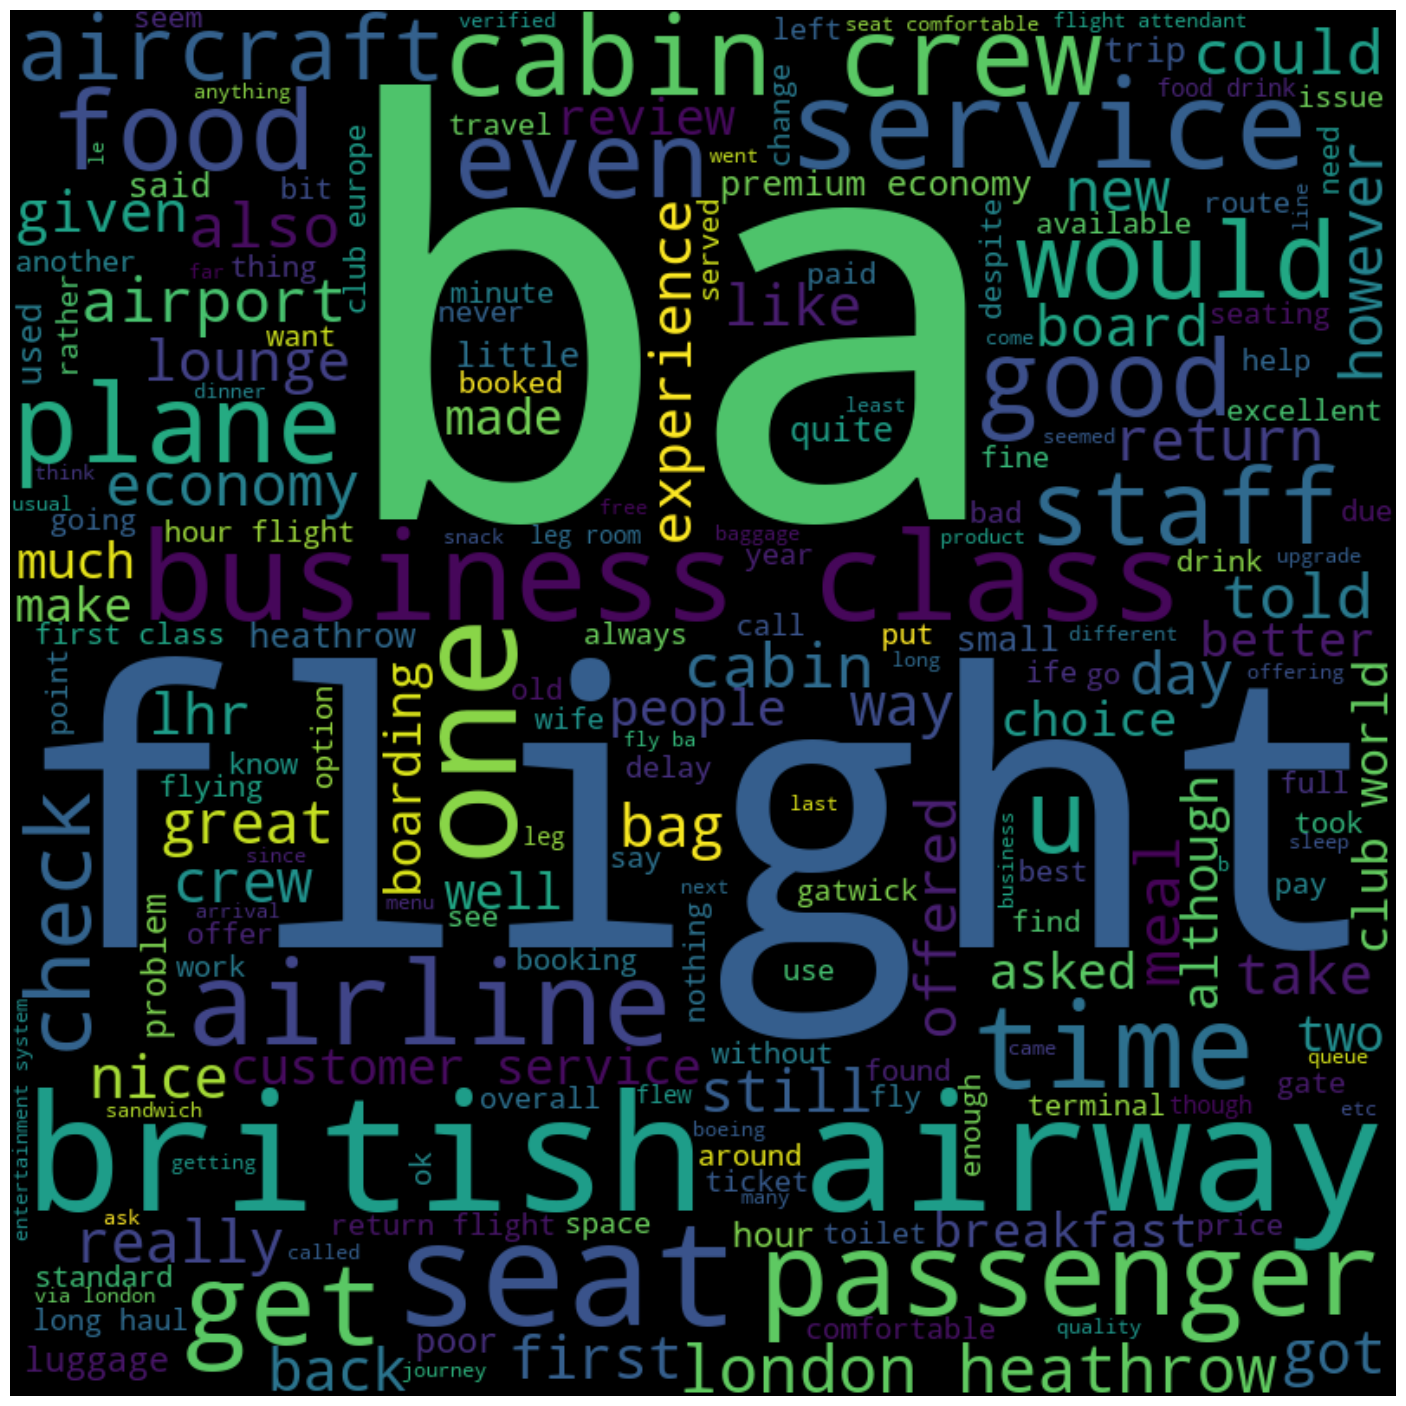

In [109]:
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
stopwords = set(stopwords.words('english'))

plt.figure(figsize=(28, 18))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [113]:
stopwords.update(['ba', 'flight','british', 'airway','airline', 'plane','told', 'also','passenger',
                 'london','even','could','would','heathrow'])

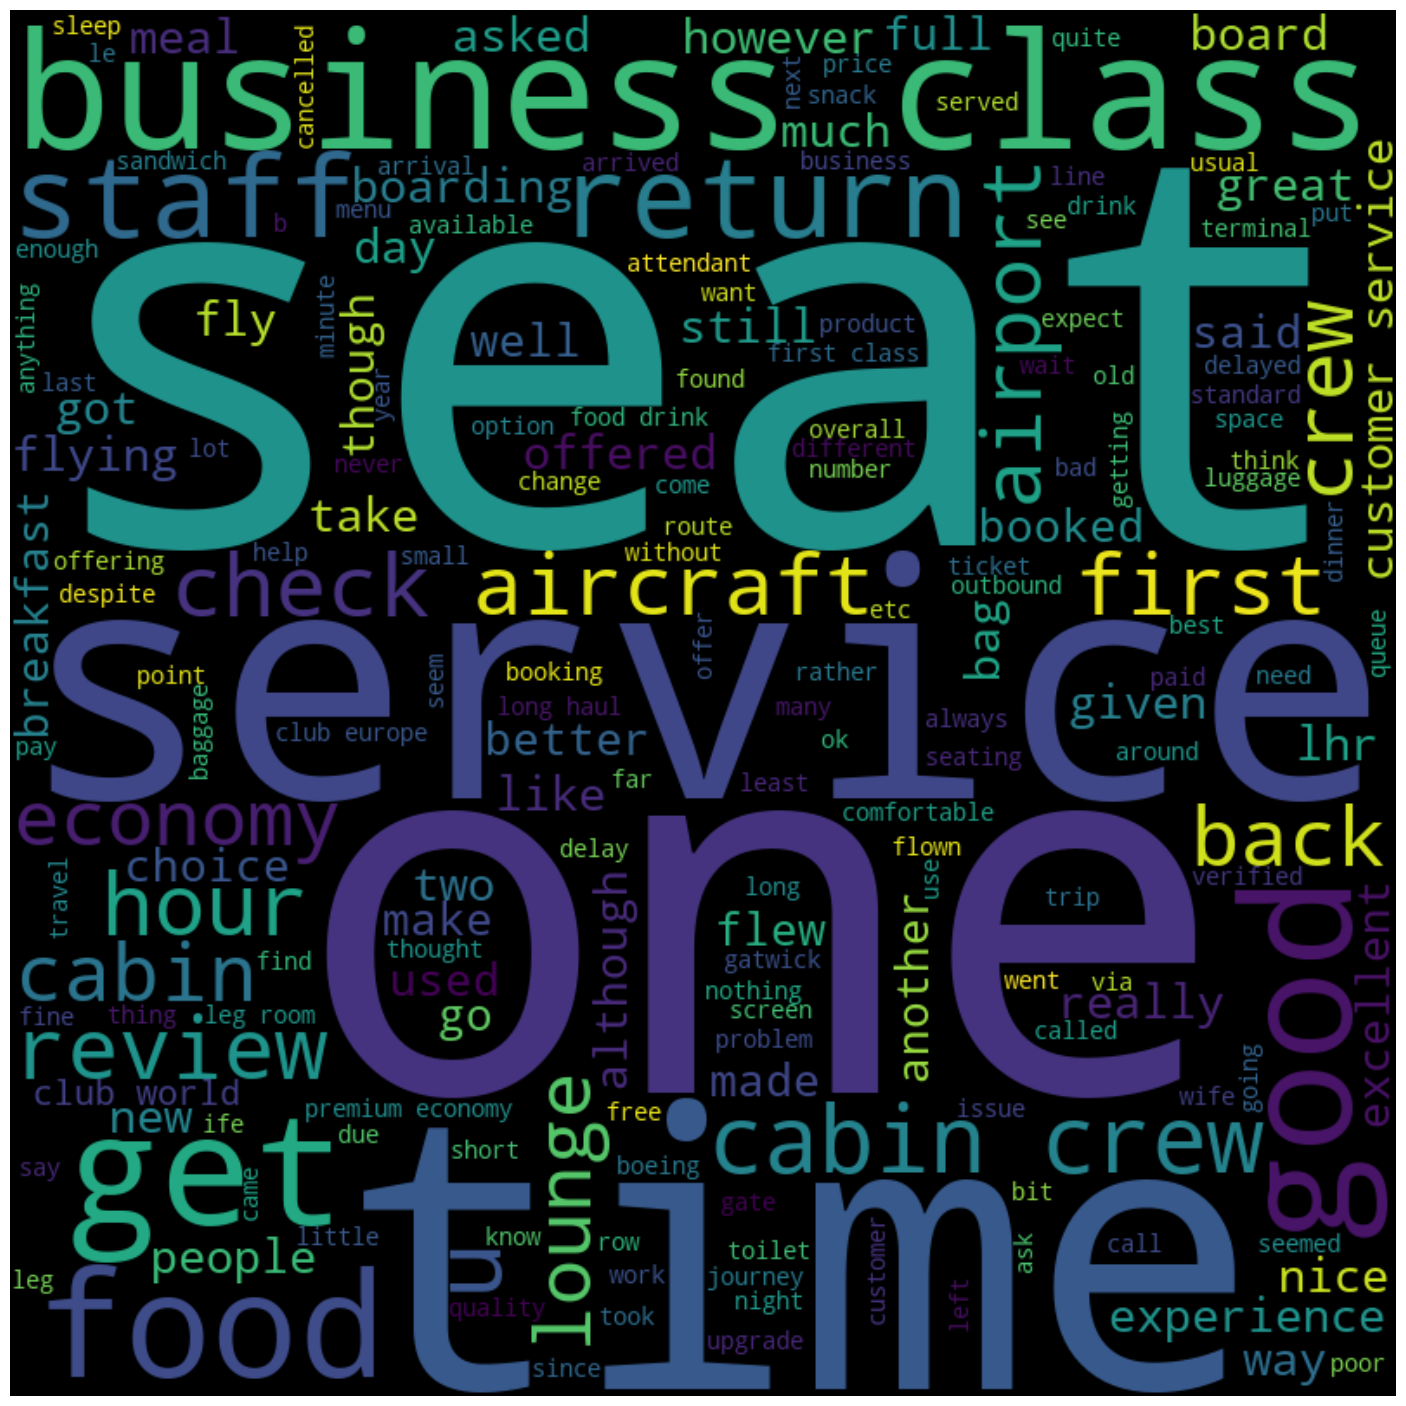

In [114]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(reviews)
plt.figure(figsize=(28, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("wordcloud.jpg")
plt.show()

In [35]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer


words = reviews.split(" ")
stopwords = text.ENGLISH_STOP_WORDS.union(['ba', 'flight','british', 'airway','airline', 'plane','told', 'also','passenger',
                 'london','even','could','would','heathrow'])

new_words = [word for word in words if word not in stopwords]
nlp_words = FreqDist(new_words).most_common(20)
all_fdist = pd.Series(dict(nlp_words))


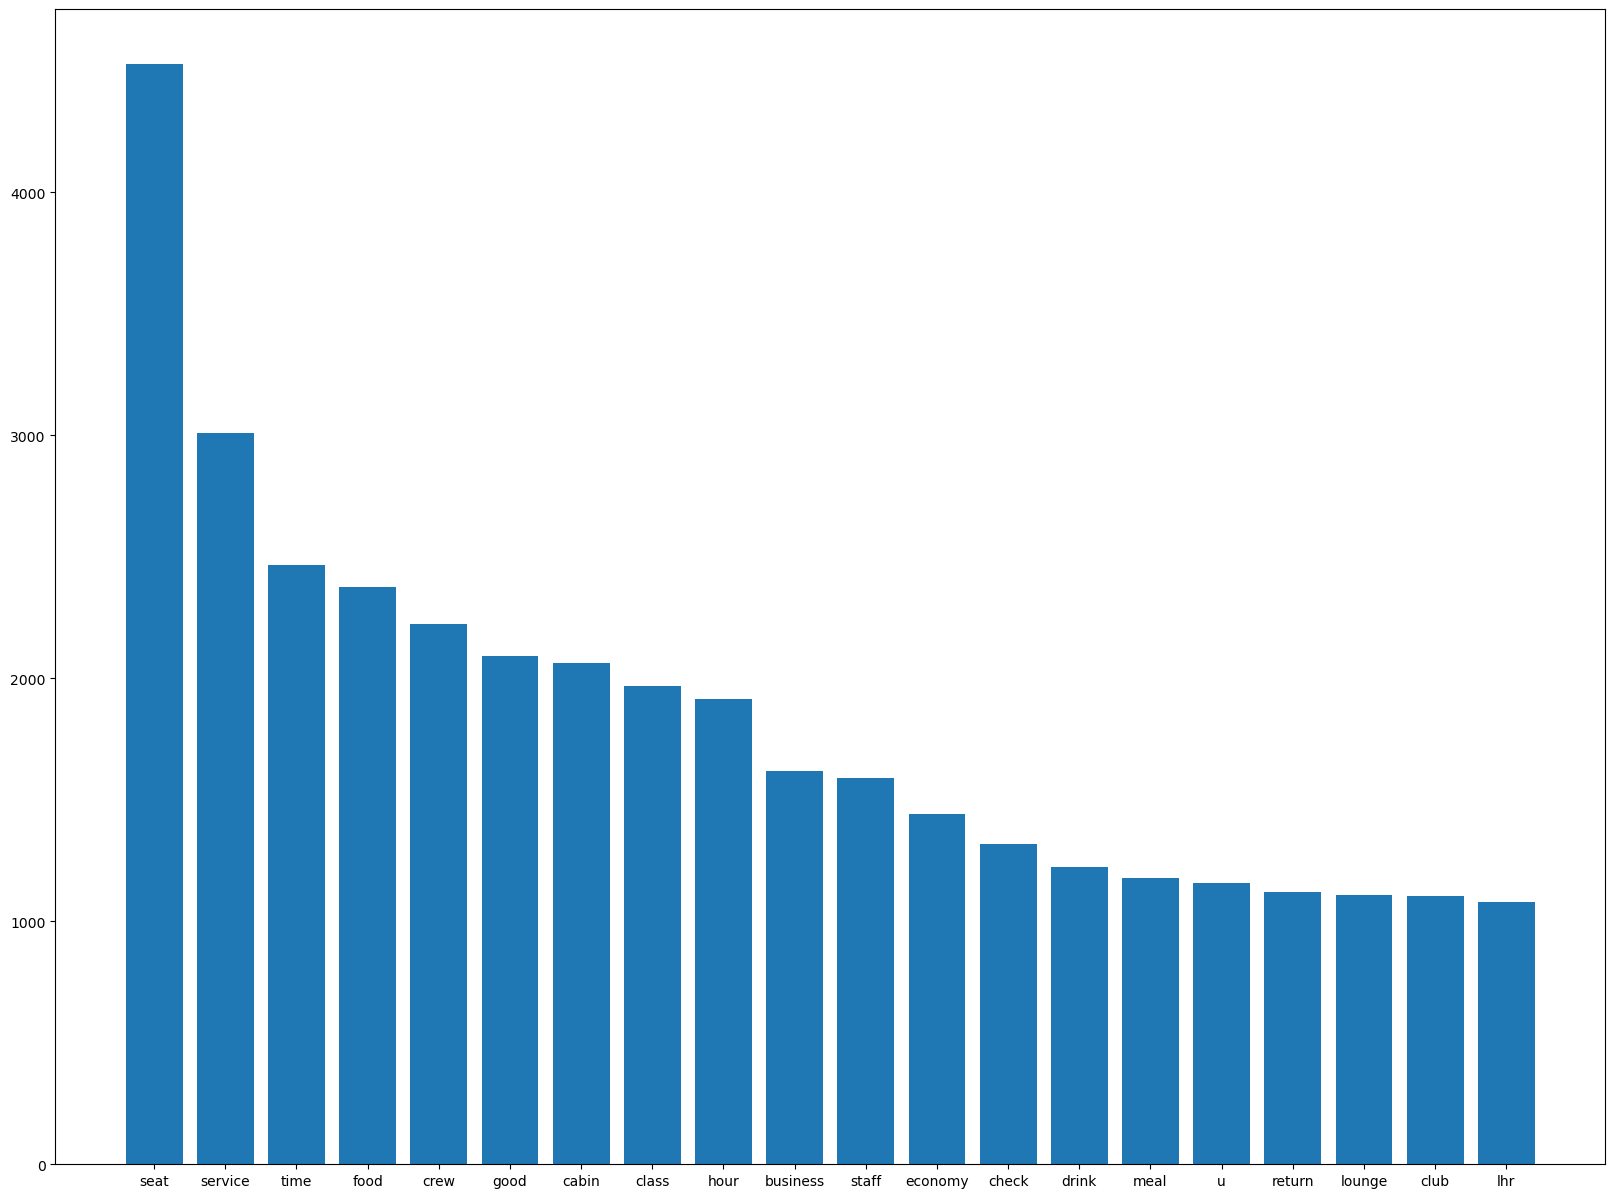

In [89]:
plt.figure(figsize=(20, 15))
plt.bar(*zip(*all_fdist.items()))
plt.savefig("dist.jpg")


<Axes: >

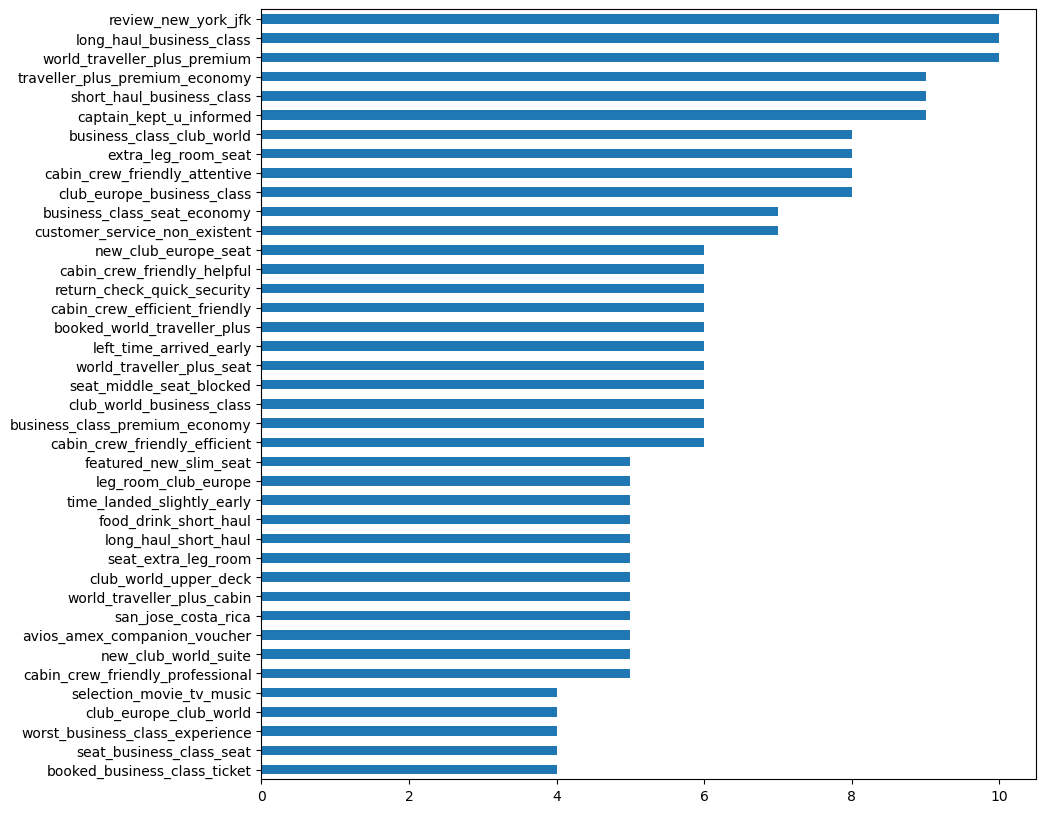

In [37]:
import nltk.collocations as collocations
from nltk import bigrams

reviews = " ".join(df.corpus)
words = reviews.split(" ")

def get_freq_dist(new_words, number_of_ngrams):
    from nltk import ngrams
    ngrams = ngrams(new_words, number_of_ngrams)
    ngram_fd = FreqDist(ngrams).most_common(40)
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind='barh')

    return ax
get_freq_dist(new_words, 4)

In [41]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

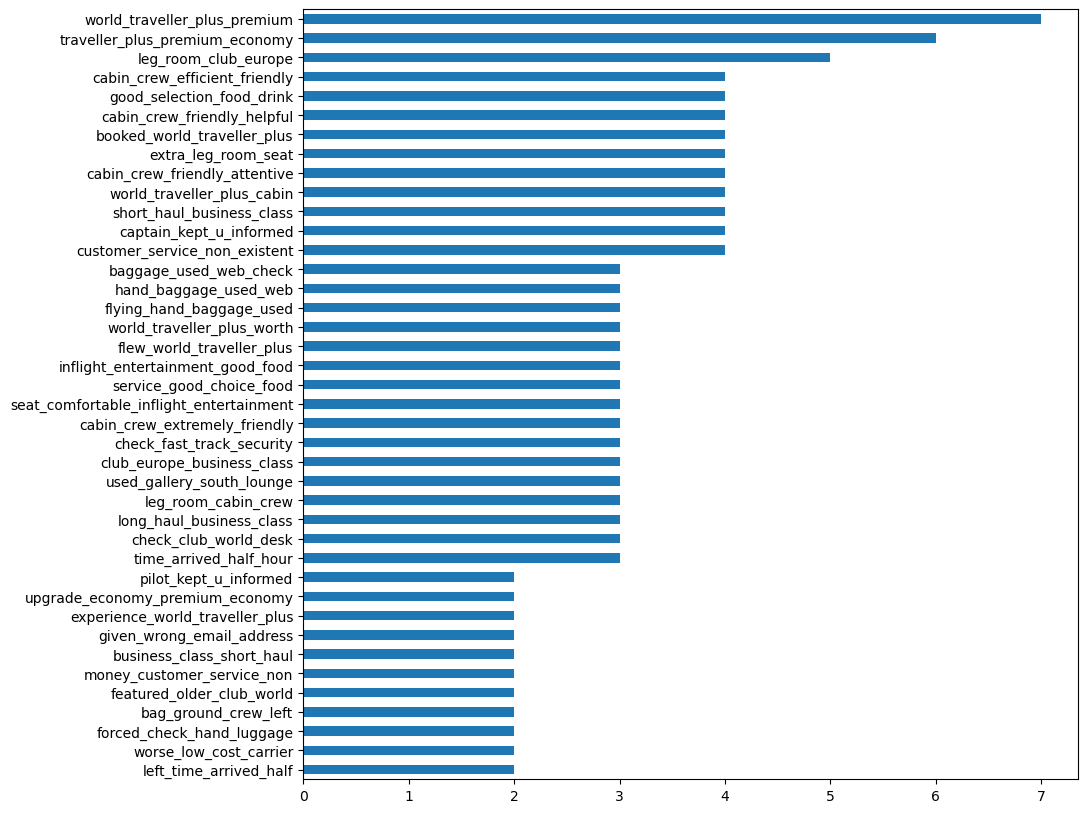

In [42]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

new_words_7_10 = [word for word in words_7_10 if word not in stopwords]
get_freq_dist(new_words_7_10, 4)

<Axes: >

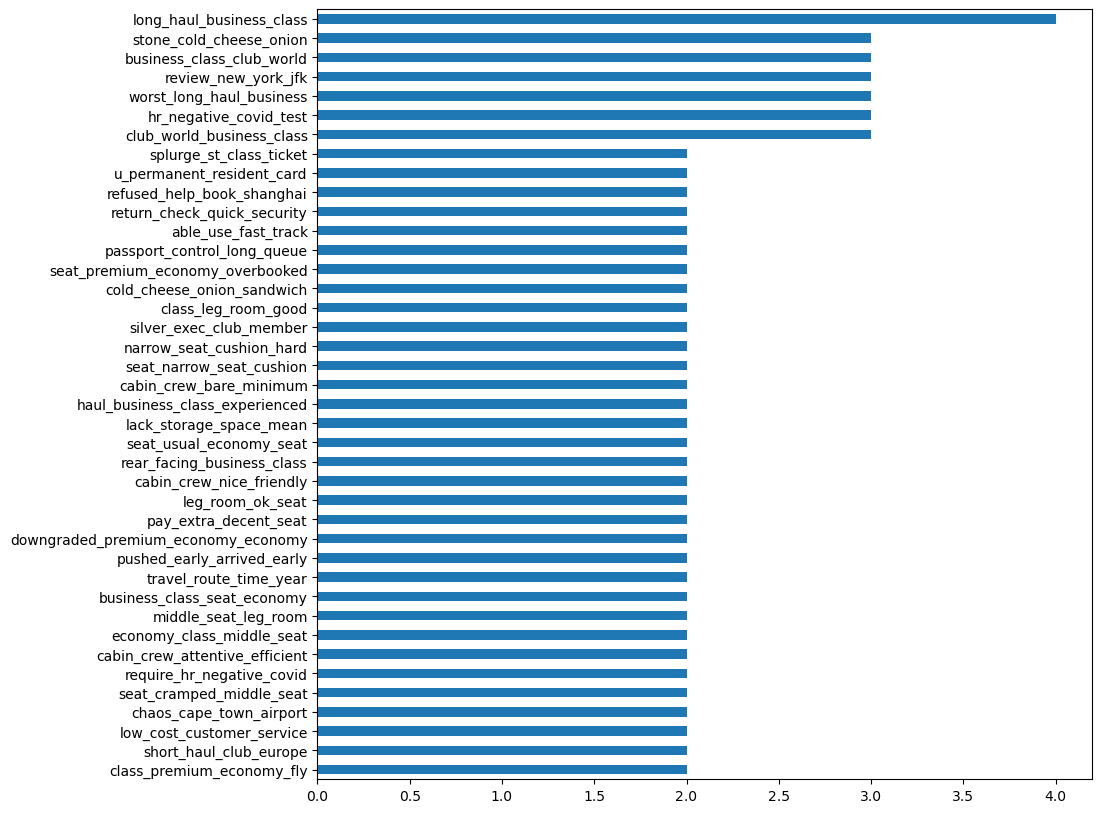

In [43]:
new_words_4_6 = [word for word in words_4_6 if word not in stopwords]
get_freq_dist(new_words_4_6, 4)

<Axes: >

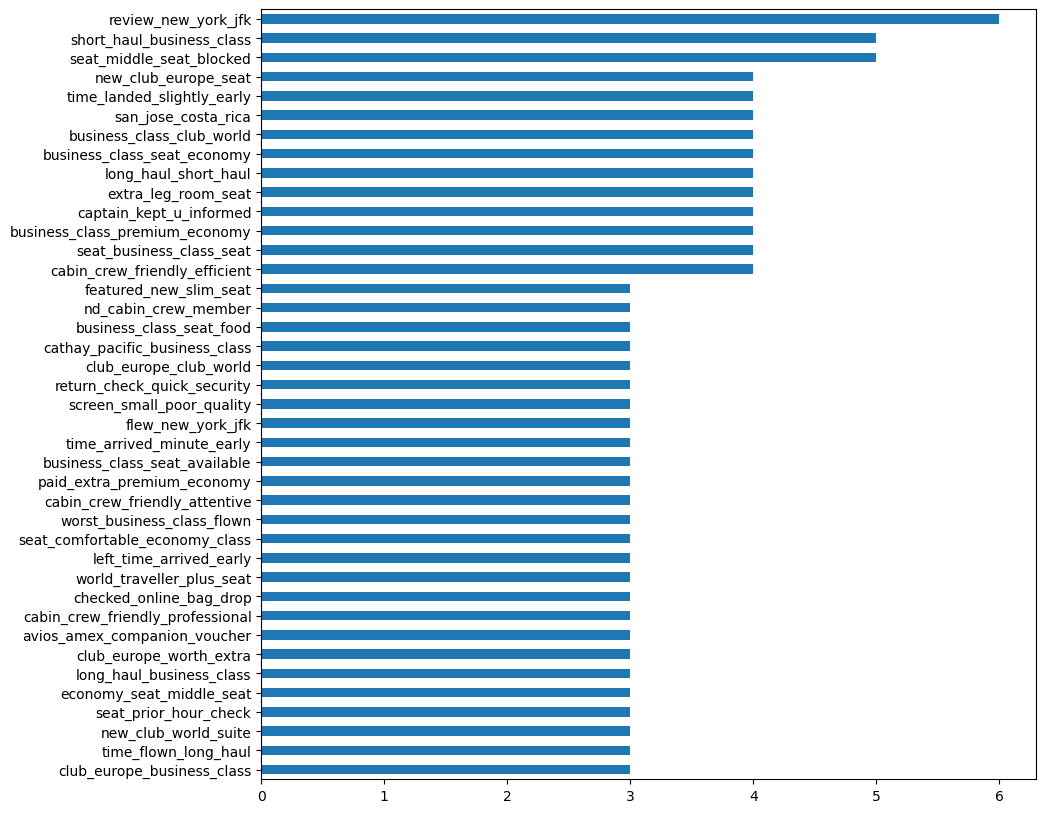

In [44]:
new_words_1_3 = [word for word in words_1_3 if word not in stopwords]
get_freq_dist(new_words_1_3, 4)

# Sentiment Analysis

In [54]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

df['polarity'] = 0.

for i in range(len(df.corpus)):
    sent = TextBlob(df.corpus[i])
    polarity = sent.sentiment.polarity
    subjectivity = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

C:\Users\rajee\AppData\Local\Temp\ipykernel_5284\3876846514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = polarity
C:\Users\rajee\AppData\Local\Temp\ipykernel_5284\3876846514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = polarity
C:\Users\rajee\AppData\Local\Temp\ipykernel_5284\3876846514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = polarity
C:\Users\raje

KeyError: 3089

In [60]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

df['label'] = 0

for i in range(len(df.corpus)):
    score = vds.polarity_scores(df.corpus[i])['compound']

    if score > 0.2:
        df['label'][i] = 1
    elif score < 0:
        df['label'][i] = -1
    else:
        df['label'][i] = 0

C:\Users\rajee\AppData\Local\Temp\ipykernel_5284\456881679.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = -1
C:\Users\rajee\AppData\Local\Temp\ipykernel_5284\456881679.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 1
C:\Users\rajee\AppData\Local\Temp\ipykernel_5284\456881679.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = -1
C:\Users\rajee\AppData\Local\Temp\ipykernel_

KeyError: 3089

In [61]:
df.head()

reviews         country  stars  \
0  Not Verified | Overall journey wasn’t bad howe...  United Kingdom    5.0   
1  ✅ Trip Verified |  Overall very satisfied. Gro...  United Kingdom    4.0   
2  ✅ Trip Verified |  As always when I fly BA it ...           Spain    9.0   
3  ✅ Trip Verified |  First time using BA busines...  United Kingdom    1.0   
4  Not Verified |  Extremely rude ground service....   United States    9.0   

         date  verified                                             corpus  \
0  2024-01-12     False  verified overall journey bad however end bagga...   
1  2024-01-12      True  overall satisfied ground staff member yvr extr...   
2  2024-01-09      True  always fly ba total shamble booked manchester ...   
3  2024-01-07      True  first time using ba business class pleased ser...   
4  2024-01-03     False  verified extremely rude ground service non rev...   

   polarity  label  
0 -0.200000     -1  
1  0.102193      1  
2  0.065556     -1  
3  0.249320      1  
4  0.191667      1

In [62]:
df.label.value_counts()

label
 1    1913
-1    1064
 0     749
Name: count, dtype: int64

In [104]:
df_pos = df[df.label == 1]
df_pos.head()

reviews         country  stars  \
1  ✅ Trip Verified |  Overall very satisfied. Gro...  United Kingdom    4.0   
3  ✅ Trip Verified |  First time using BA busines...  United Kingdom    1.0   
4  Not Verified |  Extremely rude ground service....   United States    9.0   
6  ✅ Trip Verified |  For the price paid (bought ...  United Kingdom    1.0   
9  Not Verified | This review is for LHR-SYD-LHR....  United Kingdom    2.0   

         date  verified                                             corpus  \
1  2024-01-12      True  overall satisfied ground staff member yvr extr...   
3  2024-01-07      True  first time using ba business class pleased ser...   
4  2024-01-03     False  verified extremely rude ground service non rev...   
6  2023-12-29      True  price paid bought sale decent experience altho...   
9  2023-12-27     False  verified review lhr syd lhr ba ba business cla...   

   polarity  label  
1  0.102193      1  
3  0.249320      1  
4  0.191667      1  
6  0.115000      1  
9  0.136976      1

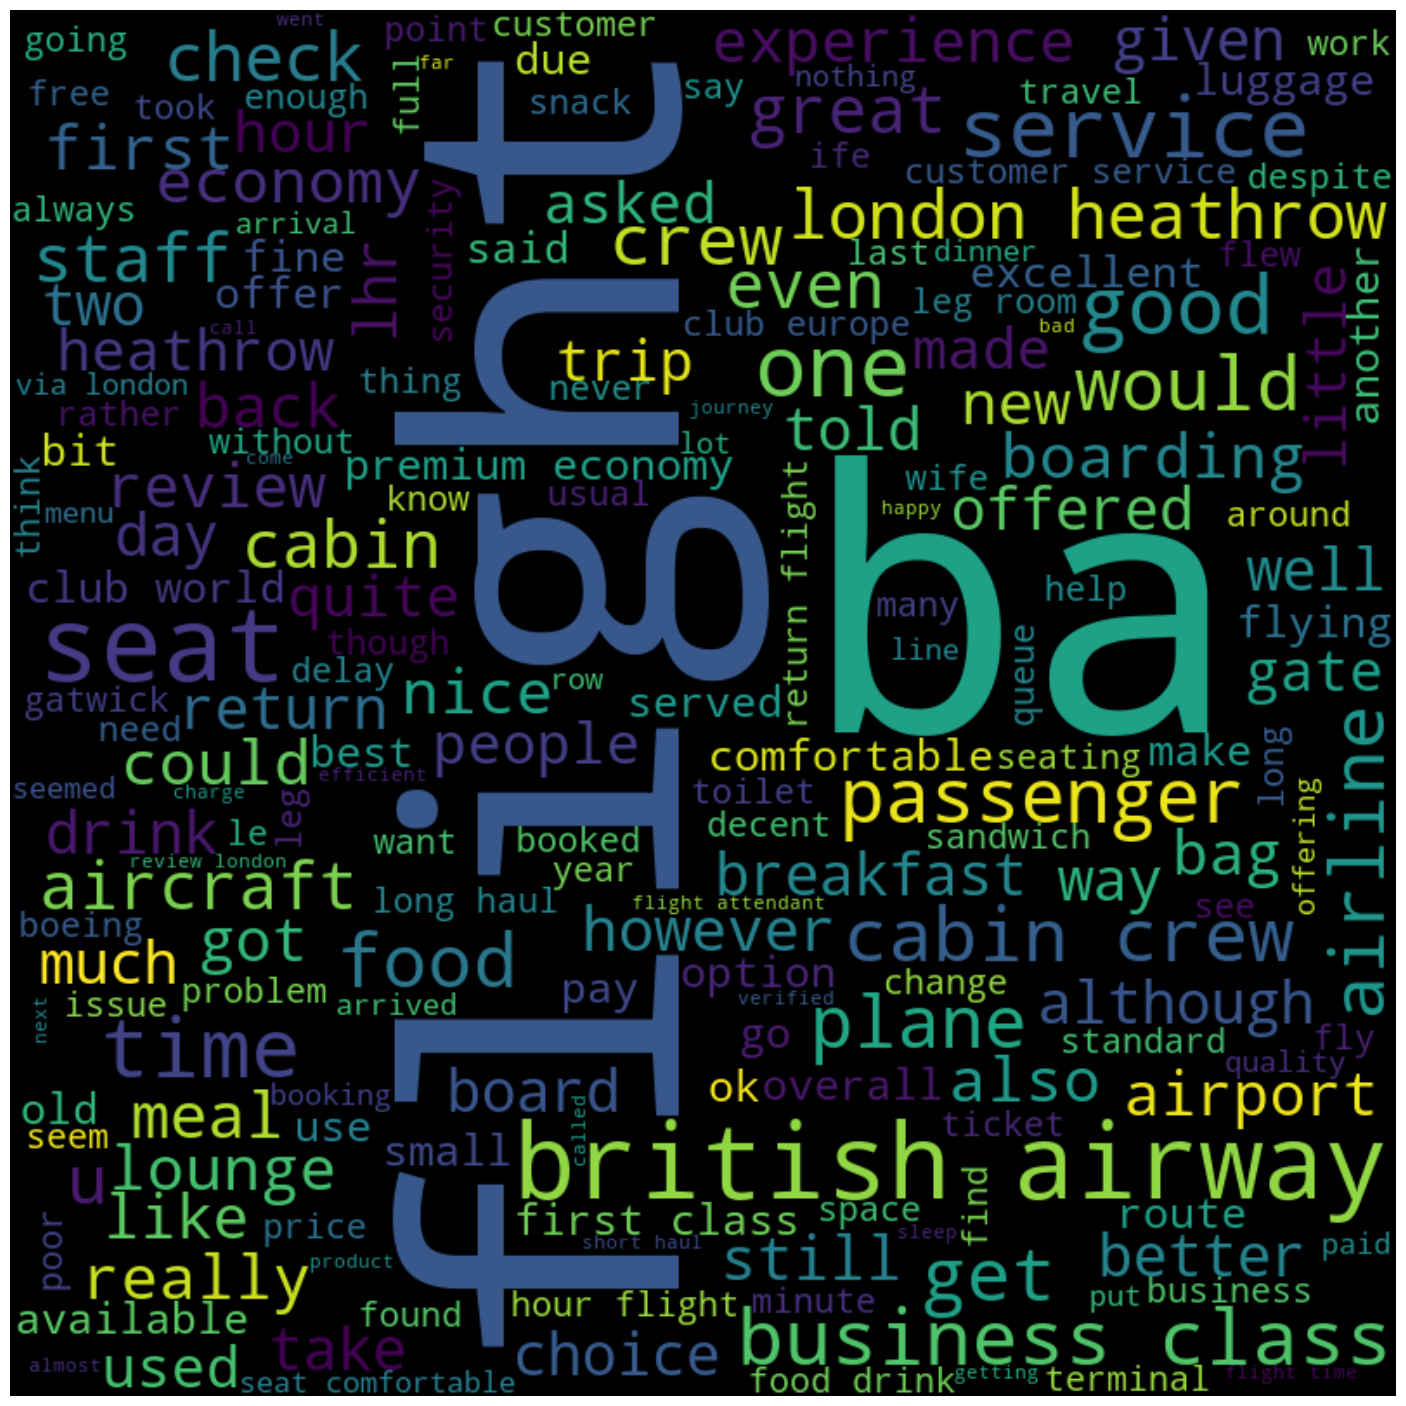

In [115]:
from nltk.corpus import stopwords
reviews_pos = " ".join(df_pos.corpus)
stopwords = set(stopwords.words('english'))

plt.figure(figsize=(28, 18))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(reviews_pos)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Topic Modelling

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [66]:
from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

topic_dict = {}

for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words"% (topic_idx)] = ['{}'.format(tf_feature_names[i]) for i in topic.argsort()[:-10-1:-1]]
    topic_dict["Topic %d weights"% (topic_idx)] = ['{:.1f}'.format(topic[i]) for i in topic.argsort()[:-10-1:-1]]

df_topic = pd.DataFrame(topic_dict)

In [67]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        flight            44.0        flight          1749.8            ba   
1       glasgow            38.4          seat           893.0        flight   
2        london            36.8         check           663.7          hour   
3         delay            33.9          time           645.6          seat   
4       delayed            33.2            ba           638.2           lhr   
5          hour            29.9          crew           612.5      boarding   
6      outbound            19.8      boarding           539.8         check   
7    connection            17.1         cabin           533.9          late   
8          aviv            15.9       service           503.2           one   
9           due            15.8         staff           455.6         plane   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           416.9            ba           929.4        flight          2244.8   
1           287.4       airline           528.0            ba          1068.2   
2           179.8       service           456.2          hour           728.8   
3           175.5        flight           377.9           day           581.3   
4           155.9       british           346.6        london           549.9   
5           125.5        airway           324.4          told           536.4   
6           113.4          food           306.2      customer           519.3   
7           113.3          seat           285.5        airway           517.7   
8           109.8          year           246.4       british           513.2   
9           107.2         class           245.9           get           510.5   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight           690.5          seat            53.1        flight   
1        airway           630.3         dhabi            24.2          seat   
2       british           629.6           abu            24.2            ba   
3          seat           614.4         asked            20.0          good   
4         class           527.8        buenos            19.1          food   
5      business           487.8          doha            18.9          crew   
6       service           392.0          aire            18.1       service   
7       airline           366.5         qatar            16.8         cabin   
8       economy           311.5        pillow            14.5         class   
9        london           303.8           row            12.5          time   

  Topic 7 weights  
0          2582.3  
1          2368.8  
2          1718.4  
3          1502.3  
4          1445.7  
5          1346.1  
6          1178.7  
7          1169.8  
8           956.1  
9           944.3

In [68]:
df.head()

reviews         country  stars  \
0  Not Verified | Overall journey wasn’t bad howe...  United Kingdom    5.0   
1  ✅ Trip Verified |  Overall very satisfied. Gro...  United Kingdom    4.0   
2  ✅ Trip Verified |  As always when I fly BA it ...           Spain    9.0   
3  ✅ Trip Verified |  First time using BA busines...  United Kingdom    1.0   
4  Not Verified |  Extremely rude ground service....   United States    9.0   

         date  verified                                             corpus  \
0  2024-01-12     False  verified overall journey bad however end bagga...   
1  2024-01-12      True  overall satisfied ground staff member yvr extr...   
2  2024-01-09      True  always fly ba total shamble booked manchester ...   
3  2024-01-07      True  first time using ba business class pleased ser...   
4  2024-01-03     False  verified extremely rude ground service non rev...   

   polarity  label  
0 -0.200000     -1  
1  0.102193      1  
2  0.065556     -1  
3  0.249320      1  
4  0.191667      1

In [72]:
len(df.country.unique())

72

AttributeError: Line2D.set() got an unexpected keyword argument 'kind'

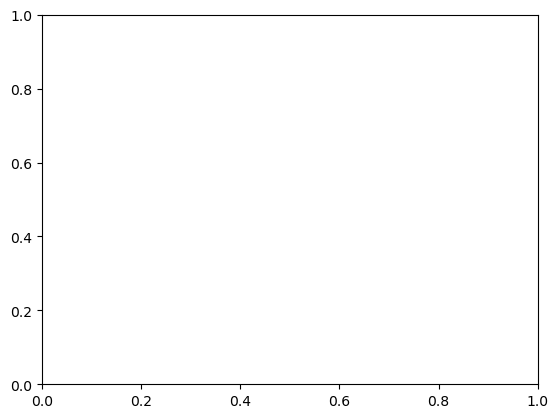

In [78]:
plt.plot(df.stars, kind='barh')

In [88]:
df.stars.value_counts()

stars
1.0     869
2.0     425
3.0     407
8.0     367
10.0    323
9.0     311
7.0     311
5.0     270
4.0     250
6.0     193
Name: count, dtype: int64

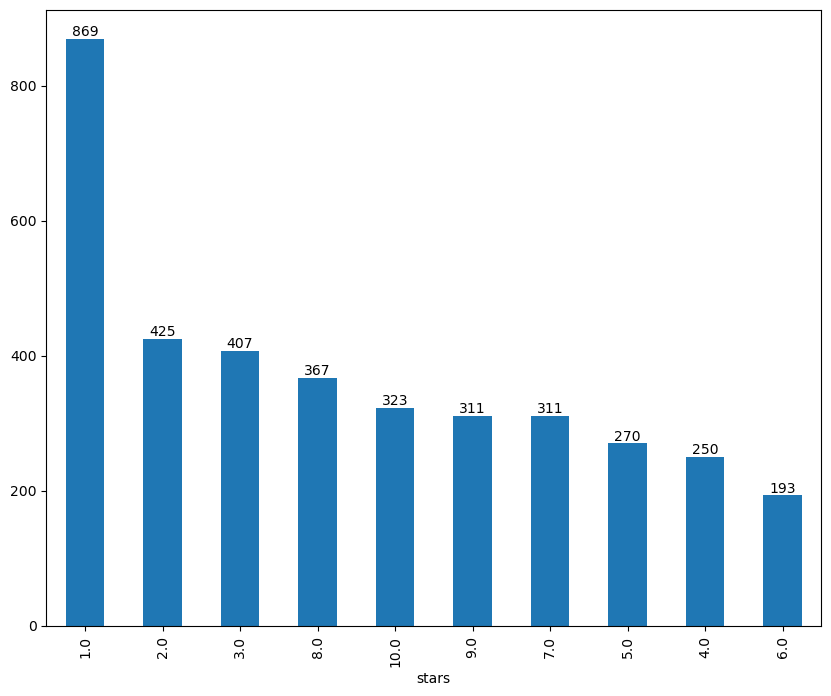

In [101]:
ratings = df.stars.value_counts()
ax = ratings.plot(kind='bar', figsize=(10,8))
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.savefig("rating.jpg")

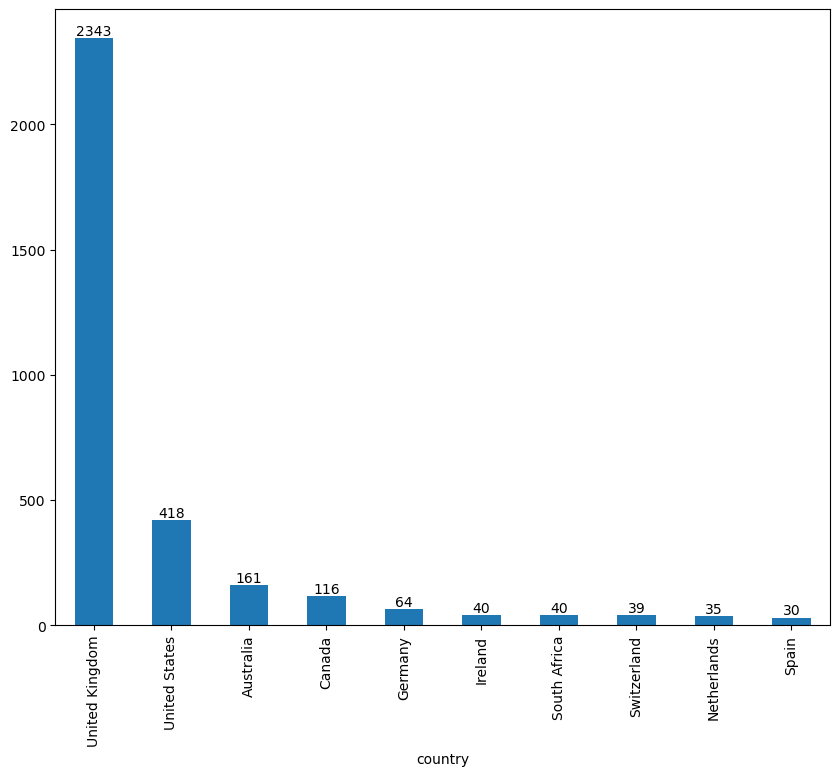

In [102]:
top_5_countries = df.country.value_counts()[:10]
ax = top_5_countries.plot(kind='bar',figsize=(10,8))

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.savefig("country.jpg")

In [103]:
len(df)

3726